In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import ast
import collections
import re 
import six
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None

In [3]:
df_ted = pd.read_csv('ted_main_dummy_columns.csv')
df_ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 47 columns):
comments               2550 non-null int64
description            2550 non-null object
duration               2550 non-null int64
event                  2550 non-null object
film_date              2550 non-null int64
languages              2550 non-null int64
main_speaker           2550 non-null object
name                   2550 non-null object
num_speaker            2550 non-null int64
published_date         2550 non-null int64
ratings                2550 non-null object
related_talks          2550 non-null object
speaker_occupation     2550 non-null object
tags                   2550 non-null object
title                  2550 non-null object
url                    2550 non-null object
views                  2550 non-null int64
Literature             2550 non-null int64
Art                    2550 non-null int64
Economy_Politics       2550 non-null int64
Medicine               

In [17]:
 df_ted.groupby('popularity_class')['TED', 'TEDx', 'TED_Global', 'TED_Other', 'Non_TED_University', 'Non_TED_Other'].sum()
df_ted['Non_TED_University'].sum()

5

In [104]:
#plt.bar(gp_events, 'popularity_class')
#sns.catplot(y="TEDx", x="popularity_class", kind="bar", data=df_ted);
df_ted['TED_classes'] = ''
df_ted.loc[(df_ted.TED == 1), 'TED_classes'] = 'TED'
df_ted.loc[(df_ted.TEDx == 1), 'TED_classes'] = 'TEDx'
df_ted.loc[(df_ted.TED_Global == 1), 'TED_classes'] = 'TED_Global'
df_ted.loc[(df_ted.TED_Other == 1), 'TED_classes'] = 'TED_Other'
df_ted.loc[(df_ted.Non_TED_University == 1), 'TED_classes'] = 'Non_TED_Other'#'Non_TED_University'
df_ted.loc[(df_ted.Non_TED_Other == 1), 'TED_classes'] = 'Non_TED_Other'
df_ted['TED_classes']

0              TED
1              TED
2              TED
3              TED
4              TED
5              TED
6              TED
7              TED
8              TED
9              TED
10             TED
11             TED
12             TED
13             TED
14             TED
15             TED
16             TED
17             TED
18             TED
19      TED_Global
20             TED
21             TED
22             TED
23             TED
24             TED
25      TED_Global
26      TED_Global
27             TED
28             TED
29             TED
           ...    
2520           TED
2521          TEDx
2522           TED
2523          TEDx
2524           TED
2525          TEDx
2526           TED
2527          TEDx
2528          TEDx
2529          TEDx
2530           TED
2531          TEDx
2532           TED
2533           TED
2534          TEDx
2535    TED_Global
2536          TEDx
2537           TED
2538          TEDx
2539           TED
2540           TED
2541        

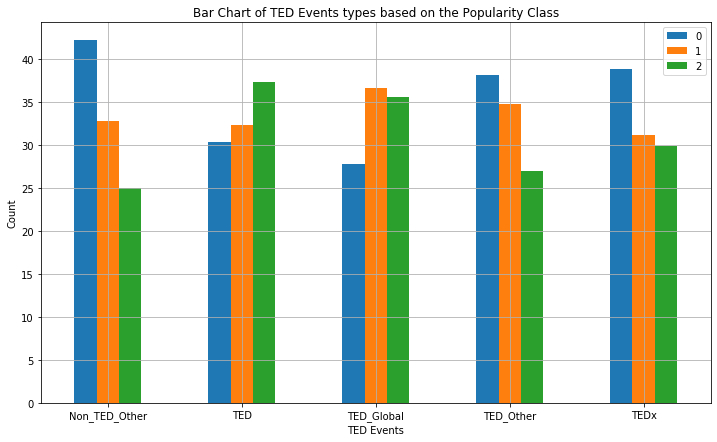

In [105]:
#sns.barplot(x="TED_classes", y="popularity", hue="popularity_class", data=df_ted, estimator=lambda x: len(x) / len('TED_classes') * 100);

"""x, y, hue = "TED_classes", "prop", "popularity_class"
hue_order = [0, 1, 2]

#f, axes = plt.subplots(1, 2)
#sns.countplot(x=x, hue=hue, data=df_ted, ax=axes[0])

prop_df = (df_ted[x]
           .groupby(df_ted[hue])#df_ted[hue]
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)#, ax=axes[1])"""

"""props = df_ted.groupby("popularity_class")['TED_classes'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')"""

temp = df_ted.groupby(['TED_classes', 'popularity_class']).size()
temp2 = temp.groupby(level=[0]).apply(lambda g: g*100 / g.sum())

myPlot = temp2.unstack(1).plot(kind='bar', stacked = False, figsize=(12,7), grid=True,rot=0)


#myPlot = df_ted.groupby(['TED_classes', 'popularity_class']).size().unstack(1).plot(kind='bar', stacked = False, figsize=(9,7), grid=True,rot=0)
plt.title('Bar Chart of TED Events types based on the Popularity Class')
plt.xlabel('TED Events')
plt.ylabel('Count')
plt.legend(('0', '1', '2'), loc='best')
plt.show()


In [101]:
df_ted.speaker_trend.median()

10.298611115